# LDA - Collapsed Gibss Sampling

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import random 
from collections import Counter

%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
# CHATGPT
def collapsed_gibbs_sampling_lda(documents, num_topics, num_iterations, alpha, beta):
    # Initialize parameters
    num_docs = len(documents)
    vocab_size = max(max(doc) for doc in documents) + 1
    doc_topic_counts = np.zeros((num_docs, num_topics))
    topic_word_counts = np.zeros((num_topics, vocab_size))
    topic_counts = np.zeros(num_topics)
    doc_lengths = np.array([len(doc) for doc in documents])

    # Initialize topics randomly
    topics = [np.random.randint(num_topics, size=len(doc)) for doc in documents]

    # Initialize counts
    for d, doc in enumerate(documents):
        for i, word in enumerate(doc):
            topic = topics[d][i]
            doc_topic_counts[d, topic] += 1
            topic_word_counts[topic, word] += 1
            topic_counts[topic] += 1

    # Collapsed Gibbs Sampling iterations
    for iteration in range(num_iterations):
        for d, doc in enumerate(documents):
            for i, word in enumerate(doc):
                # Decrement counts
                topic = topics[d][i]
                doc_topic_counts[d, topic] -= 1
                topic_word_counts[topic, word] -= 1
                topic_counts[topic] -= 1

                # Sample new topic
                p_topic = (doc_topic_counts[d] + alpha) * (topic_word_counts[:, word] + beta[word]) / (topic_counts + beta.sum())
                new_topic = np.random.choice(num_topics, p=p_topic / p_topic.sum())

                # Update counts
                doc_topic_counts[d, new_topic] += 1
                topic_word_counts[new_topic, word] += 1
                topic_counts[new_topic] += 1
                topics[d][i] = new_topic

    return topics, doc_topic_counts, topic_word_counts

**Pseudocodigo - Darling LDA**

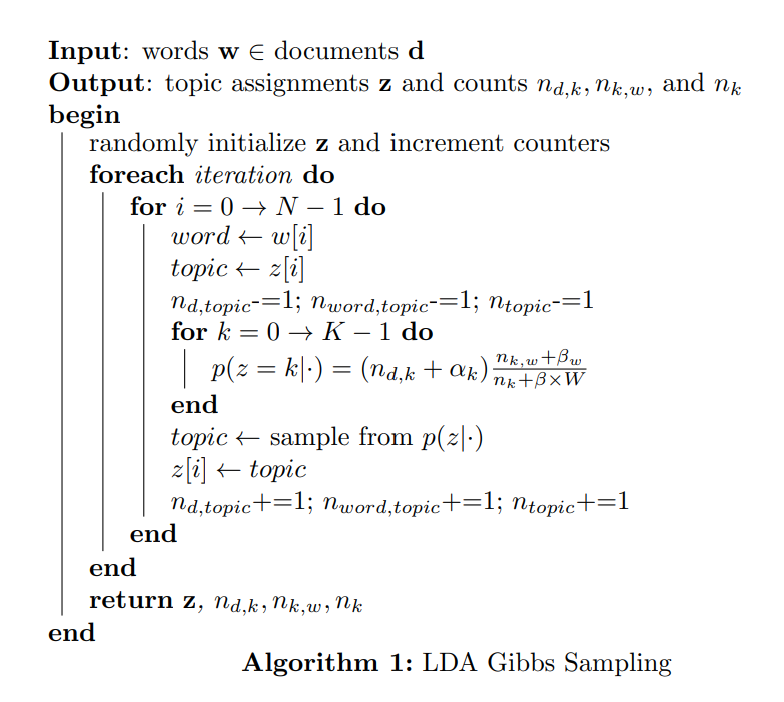


In [11]:
def lda_gibbs(corpus, alpha, beta, num_topics, max_iter):
    ######################################################
    # Input: words w in documents d -> corpus
    # vocabulario como parametro de entrada?
    
    # Output: topic assignments z and counts 
    # n_{d,k}: numero de palabras asignadas a topico k en documento d
    # n_{k,w}: numero de veces palabra w es asignada a topico k en cualquier documento
    # n_{k}: numero total de palabras en todos los documentos asignadas a topico k 
    ##############################################################
    
    # Collapsed Gibbs Sampling
    # INICIALIZACION
    Z = [] # topicos 
    num_docs = len(corpus)
    vocab_size = len(set(word for doc in corpus for word in doc)) # len(vocab)
    
    # Inicializacion aleatoria de Z y counters
    for idx, doc in enumerate(corpus): # Para cada documento del corpus
        # Inicializacion uniforme para palabras en el documento
        Zd = np.random.randint(low = 0, high = num_topics, size = len(doc))
        Z.append(Zd)
    
    # n_dk: numero de palabras asignadas a topico k en documento d
    n_dk = np.zeros((num_docs, num_topics))
    for d in range(num_docs):
        for k in range(num_topics):
            n_dk[d,k] = np.sum(Z[d] == k) # Para el documento d, Z[d], cuantos son topico k
            
    # n_kw: numero de veces palabra w es asignada a topico k en todo el corpus
    n_kw = np.zeros((num_topics, vocab_size))
    for doc_id, doc in enumerate(corpus):
        for i, word in enumerate(doc):
            topic = Z[doc_id][i]
            n_kw[topic, word] += 1
            
    # n_k: numero de palabras en todos los documentos asiganadas a topico k
    n_k = np.sum(n_kw, axis = 1)
    
    # Topicos
    topic_list = [i for i in range(num_topics)]
    
    # Algoritmo
    iter = 0
    
    while (iter < max_iter):
        for doc_id, doc in enumerate(corpus): # recorremos documentos en corpus
            for i in range(len(doc)): # recorrer palarbas en documento 
                word = doc[i]
                topic = Z[doc_id][i]
                
                # quitar z_i dado que vamos a muestrear condicionando z_(-i)
                n_dk[doc_id, topic] -= 1
                n_kw[topic, word] -=1
                n_k[topic] -= 1
                
                # Codicional p(z = k | .)
                p_z = (n_dk[doc_id, :] + alpha) * (n_kw[:, word] + beta) / (n_k[:] + beta*vocab_size)
                
                # muestreo de topico
                topic = random.choices(topic_list, weights = p_z, k = 1)[0]
                
                # Update
                Z[doc_id][i] = topic
                n_dk[doc_id, topic] += 1 
                n_kw[topic, word] += 1
                n_k[topic] += 1
    
                
        iter += 1
        
    return Z, n_dk, n_kw, n_k

In [12]:
# Ejmemplo de uso

# Corpus
corpus = [[0,0,1,1], [0,0], [1,1,1], [2,2,2,1,1]] # cada lista es un documento y cada palabra un topico
num_topics = 3
max_iter = 1000
alpha = 0.1
beta = 0.1

In [19]:
# Ejemplo
Z, n_dk, n_kw, n_k = lda_gibbs(corpus, alpha, beta, num_topics, max_iter)

Z

[array([1, 1, 1, 1]), array([2, 2]), array([0, 0, 0]), array([0, 0, 0, 0, 0])]